# ${}^{4}{\rm He}$

The interaction is defined in `helium4.py`. It is nonlocal, and so is the counterterm. We will use it to tune the scattering length over a range of short-distance cutoffs, $R$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

import mu2

import helium4plusplus as he4

In [5]:
ELL = 0
R_MAX = he4.BETA6/2
R_MIN = he4.BETA6/8
N1 = 2
N2 = 3
NCT = 6

nR = 50
Rs = 2/np.linspace(2/R_MAX, 2/R_MIN, nR)

index = 8
Rsp = 2/np.linspace(2/(0.9*Rs[index]), 2/(1.1*Rs[index]), nR)
gs = np.empty(nR)
b2s = np.empty(nR)
r0s = np.empty(nR)

In [6]:
momenta = np.linspace(0.01/he4.BETA6, 0.1/he4.BETA6, 30)
X = he4.FACTOR * he4.BETA6 # K•Å^3

def inverse_a0_diff(g, sys):
    a0 = -1/sys.kcotd_gen_fast([0], g, 0)[0]
    return (1/he4.A0 - 1/a0)*he4.A0


def a0_and_r0(g, sys):
    a0 = -1/sys.kcotd_gen_fast([0], g, 0)[0]
    kcd = sys.kcotd_gen_fast(momenta, g, 0)
    r0 = 2*np.gradient(kcd, momenta**2)[0]
    return a0, r0

In [7]:
s = he4.NonlocalHelium4System2(Rsp[0], ELL, N1, N2, NCT)

In [9]:
rgf = np.loadtxt('datfiles/he4plusplus_LO_nonlocal2_2_6_6_rg_flow.txt')

In [10]:
rgf[index]

array([1.85973459e+00, 2.06100892e+03])

In [23]:
guess = -8.9
inverse_a0_diff(guess, s), s.bound_state_spectrum(guess, 0)

(-0.005862841727848414, array([-1.32860314e-03, -8.13878706e+01]))

In [24]:
for i in range(nR):
    R = Rsp[i]
    s = he4.NonlocalHelium4System2(R, ELL, N1, N2, NCT)
    result = optimize.fsolve(inverse_a0_diff, guess, args=(s), factor=0.1)
    g = result[0]
    a0, r0 = a0_and_r0(g, s)
    
    if np.abs((he4.A0 - a0)/he4.A0) < 1e-4:
        e2s = s.bound_state_spectrum(g, 0)
        n = e2s.size
        gs[i] = g
        r0s[i] = r0
        b2s[i] = np.abs(e2s[0])
        print(f'i = {i}  R = {R:.4e}  g = {g/X:.4e} X  a0 = {a0:.4e}  r0 = {r0:.4e}  b2 = {np.abs(e2s[0]):.4e}  n = {n}')
        guess = g
    else:
        break

i = 0  R = 1.6738e+00  g = -1.3169e-01 X  a0 = 1.0000e+02  r0 = 7.5151e+00  b2 = 1.3125e-03  n = 2
i = 1  R = 1.6800e+00  g = -2.1433e-01 X  a0 = 1.0000e+02  r0 = 7.5176e+00  b2 = 1.3126e-03  n = 2
i = 2  R = 1.6863e+00  g = -2.9933e-01 X  a0 = 1.0000e+02  r0 = 7.5202e+00  b2 = 1.3126e-03  n = 2
i = 3  R = 1.6926e+00  g = -3.8691e-01 X  a0 = 1.0000e+02  r0 = 7.5230e+00  b2 = 1.3127e-03  n = 2
i = 4  R = 1.6990e+00  g = -4.7729e-01 X  a0 = 1.0000e+02  r0 = 7.5259e+00  b2 = 1.3127e-03  n = 2
i = 5  R = 1.7054e+00  g = -5.7075e-01 X  a0 = 1.0000e+02  r0 = 7.5289e+00  b2 = 1.3127e-03  n = 2
i = 6  R = 1.7119e+00  g = -6.6755e-01 X  a0 = 1.0000e+02  r0 = 7.5320e+00  b2 = 1.3128e-03  n = 2
i = 7  R = 1.7184e+00  g = -7.6803e-01 X  a0 = 1.0000e+02  r0 = 7.5353e+00  b2 = 1.3128e-03  n = 2
i = 8  R = 1.7250e+00  g = -8.7255e-01 X  a0 = 1.0000e+02  r0 = 7.5387e+00  b2 = 1.3129e-03  n = 2
i = 9  R = 1.7316e+00  g = -9.8150e-01 X  a0 = 1.0000e+02  r0 = 7.5422e+00  b2 = 1.3129e-03  n = 2
i = 10  R 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [25]:
restart = 41
s = he4.NonlocalHelium4System2(Rs[restart], ELL, N1, N2, NCT)

In [53]:
guess = 978.3
inverse_a0_diff(guess, s), s.bound_state_spectrum(guess, 0)

(-0.0006569690243596327,
 array([-1.31298109e-03, -1.24646727e+02, -4.57811214e+03]))

In [54]:
for i in range(restart, nR):
    R = Rsp[i]
    s = he4.NonlocalHelium4System2(R, ELL, N1, N2, NCT)
    result = optimize.fsolve(inverse_a0_diff, guess, args=(s), factor=0.1)
    g = result[0]
    a0, r0 = a0_and_r0(g, s)
    
    if np.abs((he4.A0 - a0)/he4.A0) < 1e-4:
        e2s = s.bound_state_spectrum(g, 0)
        n = e2s.size
        gs[i] = g
        r0s[i] = r0
        b2s[i] = np.abs(e2s[0])
        print(f'i = {i}  R = {R:.4e}  g = {g/X:.4e} X  a0 = {a0:.4e}  r0 = {r0:.4e}  b2 = {np.abs(e2s[0]):.4e}  n = {n}')
        guess = g
    else:
        break

i = 41  R = 1.9741e+00  g = 1.0914e+03 X  a0 = 1.0000e+02  r0 = 7.7115e+00  b2 = 1.3155e-03  n = 1
i = 42  R = 1.9828e+00  g = 7.8296e+01 X  a0 = 1.0000e+02  r0 = 7.7178e+00  b2 = 1.3155e-03  n = 1
i = 43  R = 1.9915e+00  g = 4.0946e+01 X  a0 = 1.0000e+02  r0 = 7.7241e+00  b2 = 1.3156e-03  n = 1
i = 44  R = 2.0003e+00  g = 2.7862e+01 X  a0 = 1.0000e+02  r0 = 7.7303e+00  b2 = 1.3157e-03  n = 1
i = 45  R = 2.0093e+00  g = 2.1187e+01 X  a0 = 1.0000e+02  r0 = 7.7366e+00  b2 = 1.3158e-03  n = 1
i = 46  R = 2.0182e+00  g = 1.7133e+01 X  a0 = 1.0000e+02  r0 = 7.7427e+00  b2 = 1.3159e-03  n = 1
i = 47  R = 2.0273e+00  g = 1.4406e+01 X  a0 = 1.0000e+02  r0 = 7.7489e+00  b2 = 1.3160e-03  n = 1
i = 48  R = 2.0365e+00  g = 1.2445e+01 X  a0 = 1.0000e+02  r0 = 7.7549e+00  b2 = 1.3161e-03  n = 1
i = 49  R = 2.0457e+00  g = 1.0964e+01 X  a0 = 1.0000e+02  r0 = 7.7609e+00  b2 = 1.3162e-03  n = 1


In [55]:
plt.style.use('science')
gr = 4/3
h = 3

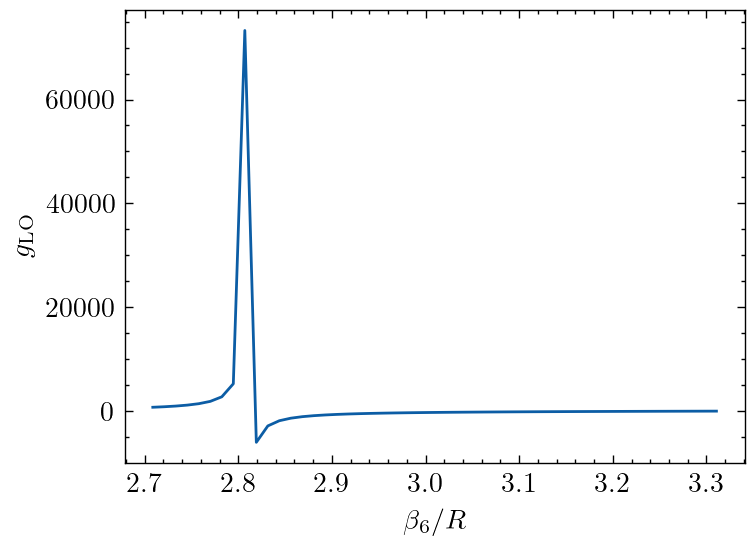

In [57]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=200)
fig.patch.set_facecolor('white')

ax.plot(he4.BETA6/Rsp, gs)

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$g_{\rm LO}$');

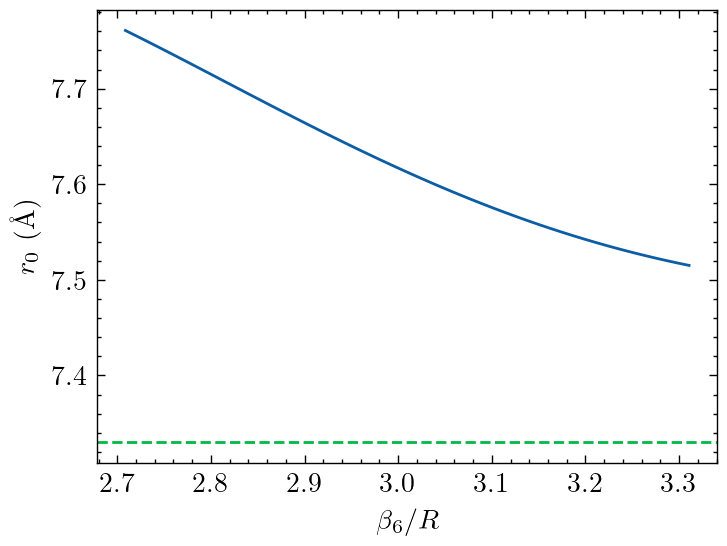

In [58]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=200)
fig.patch.set_facecolor('white')

ax.plot(he4.BETA6/Rsp, r0s)
ax.axhline(he4.R0, color='C1', linestyle='--')

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$r_0$ (Å)');

In [62]:
filename_id = f'he4plusplus_LO_nonlocal2_{N1}_{N2}_{NCT}_R_{Rs[index]:.4e}'

In [63]:
np.savetxt('datfiles/'+filename_id + '_rg_flow.txt', np.vstack((Rsp, gs)).T, header='R (Å)  g ()')

In [64]:
np.savetxt('datfiles/' + filename_id + '_r0s.txt', np.vstack((Rsp, r0s)).T, header='R (Å)  r_0 (Å)')